In [52]:
import pandas as pd                      # pandas is a dataframe library
import matplotlib.pyplot as plt          # matpoltlib.pypolt plots data
import numpy as np                       # numpy provides N-dim object support

# do plotting inline instead of in a separate window
%matplotlib inline

# Load and Review data with converting strings to integers

In [2]:
def conv_binary(cell):
    if(cell == 'satisfied' or cell == 'Loyal Customer' or cell == 'Male' or cell == 'Personal Travel' or cell == 'Eco'):
        return 1
    elif(cell == 'Eco Plus'):
        return 2
    else:
        return 0

In [3]:
#loading pima data. Adjust path if necessary
df = pd.read_excel("./satisfaction.xlsx", converters={
    "satisfaction_v2" : conv_binary,
    "Gender" : conv_binary,
    "Type of Travel" : conv_binary,
    "Class" : conv_binary,
    "Customer Type" : conv_binary
})

# df = pd.read_excel("./satisfaction.xlsx")

In [4]:
df.shape   # number of rows and number of cols

(129880, 24)

In [5]:
df.head(5)  # display data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
df.tail(15)   # dispay the end of the data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129865,82526,1,0,0,59,1,1,2641,4,5,...,2,2,1,5,2,3,3,2,5,0.0
129866,51023,1,0,0,18,1,1,1243,5,0,...,2,2,4,5,5,3,5,2,0,0.0
129867,86234,1,0,0,30,1,1,1961,5,1,...,5,5,3,2,3,4,4,5,0,0.0
129868,8518,1,0,0,45,1,1,1612,5,2,...,2,2,2,5,4,3,4,2,0,0.0
129869,80330,1,0,0,55,1,1,1953,5,2,...,5,1,1,1,3,3,4,1,0,0.0
129870,22432,1,0,0,70,1,1,1674,5,4,...,5,5,3,2,4,5,4,5,54,46.0
129871,91851,1,0,0,35,1,1,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,1,0,0,69,1,1,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,46936,1,0,0,63,1,1,1942,5,5,...,3,3,5,2,5,3,5,3,7,NaN
129874,53969,1,0,0,11,1,1,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [70]:
print("The dataset contains columns of the following data types : \n" + str(df.dtypes))

The dataset contains columns of the following data types : 
satisfaction_v2               int64
Gender                        int64
Customer_Type                 int64
Age                           int64
Type_of_Travel                int64
Class                         int64
Flight_Distance               int64
Seat_comfort                  int64
Arival_time                   int64
Gate_location                 int64
Inflight_wifi_service         int64
Inflight_entertainment        int64
On_board_service              int64
Leg_room_service              int64
Checkin_service               int64
Cleanliness                   int64
Arrival_Delay_in_Minutes    float64
dtype: object


In [7]:
df.isnull().values.any()   # check if there are any null values exist

True

In [8]:
df = df.dropna() # drop all nan values

In [9]:
df.isnull().values.any()   # check if there are any null values exist

False

In [10]:
df.shape

(129487, 24)

In [11]:
def plot_corr(df, size=24):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and Horizontal size of the plot
        
        Displays:
            matrix of correlation between columns.  darkblue-Blue-cyan-red-yellow => less to more correlated
                                                    0 -----------------> 1
                                                    Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr()     # dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks


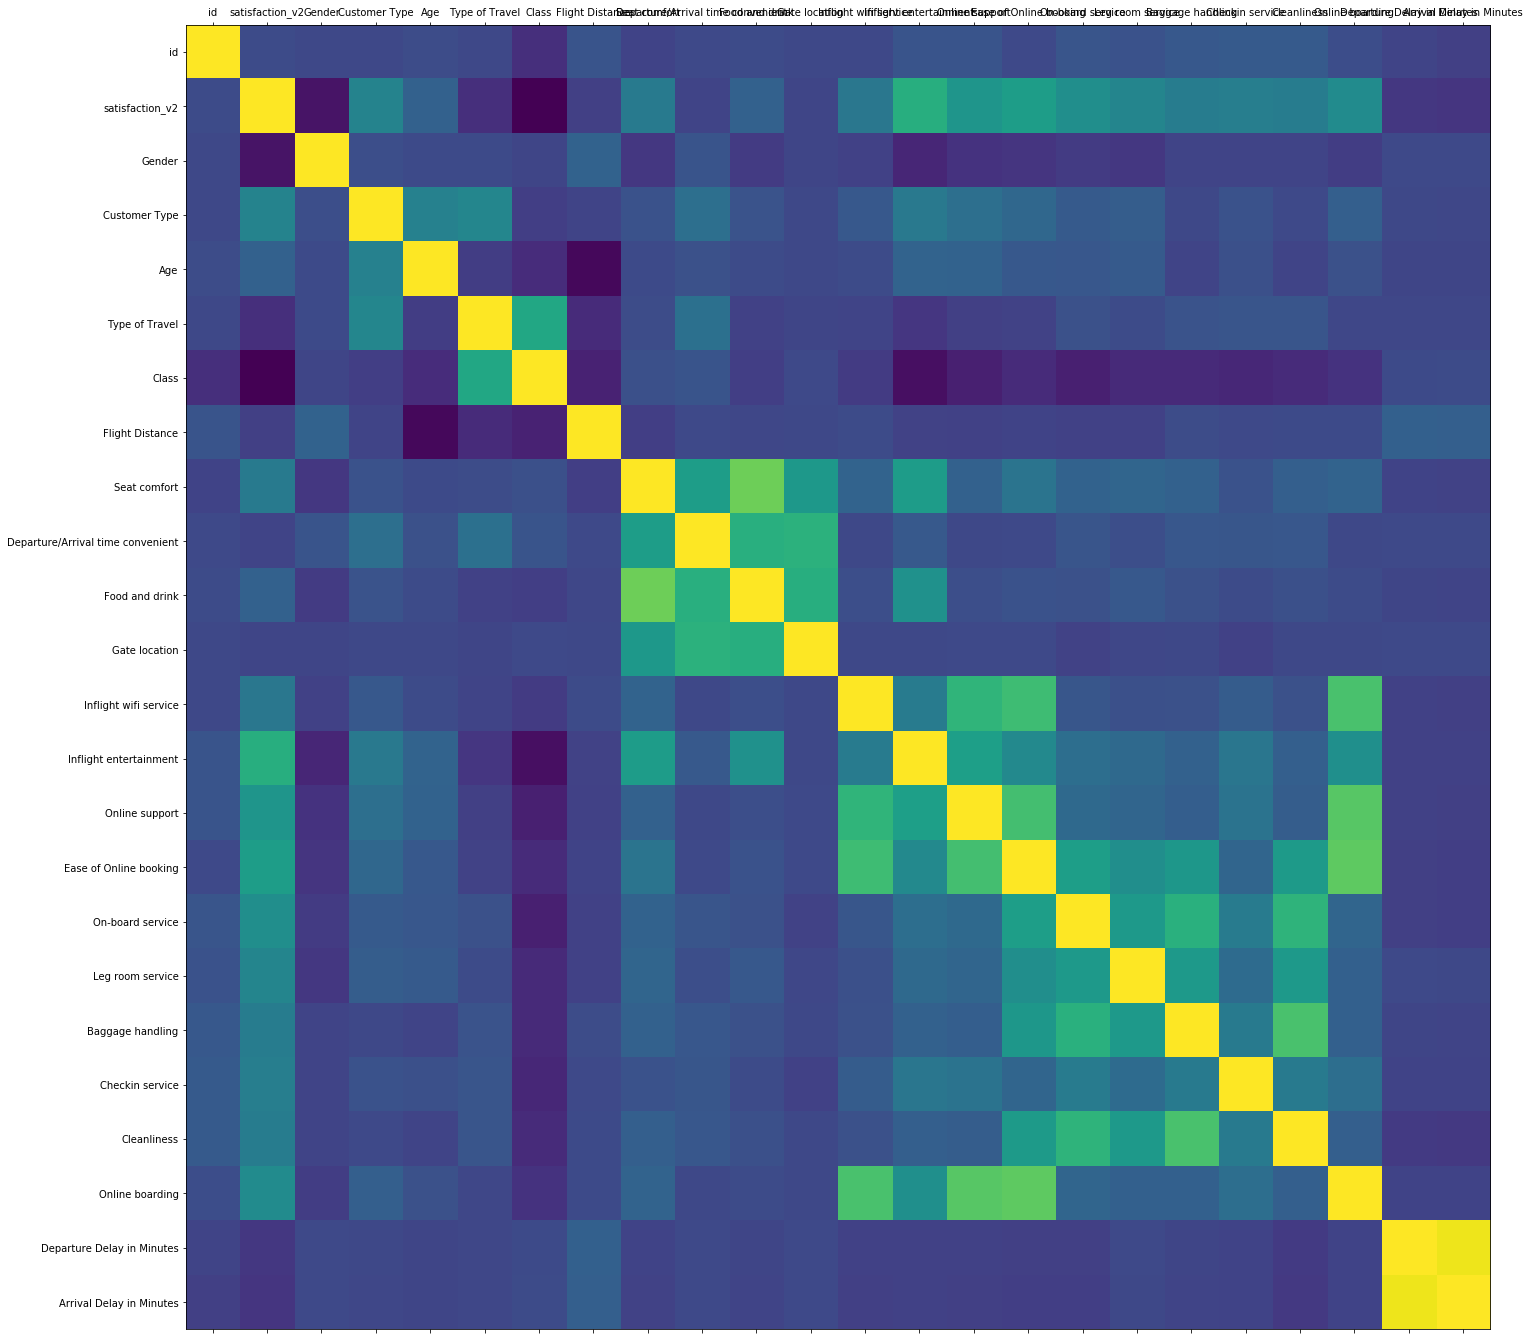

In [12]:
plot_corr(df)

## Renaming data labels to drop cols 


In [13]:
df.head()
df.rename(columns={"Food and drink":'FD',"Online boarding":'OB',
                   'Ease of Online booking':'EOOB','Online support':'OS',
                    'Baggage handling':'BH','Departure Delay in Minutes':'DDIM'}, inplace=True)

In [14]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,OS,EOOB,On-board service,Leg room service,BH,Checkin service,Cleanliness,OB,DDIM,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [15]:
# dropping cols
columns = ['FD', 'OB', 'EOOB','OS', 'BH', 'DDIM','id']
df.drop(columns, inplace = True, axis=1)

### issue to be solved please rename the labels

In [16]:
df.shape

(129487, 17)

In [17]:
df.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Arrival Delay in Minutes
0,1,0,1,65,1,1,265,0,0,2,2,4,3,0,5,3,0.0
1,1,1,1,47,1,0,2464,0,0,3,0,2,4,4,2,3,305.0
2,1,0,1,15,1,1,2138,0,0,3,2,0,3,3,4,4,0.0
3,1,0,1,60,1,1,623,0,0,3,3,4,1,0,4,1,0.0
4,1,0,1,70,1,1,354,0,0,3,4,3,2,0,4,2,0.0


# check true and false ratio

In [18]:
num_true = len(df.loc[df['satisfaction_v2'] == True])   # satisfication statuses are true
num_false = len(df.loc[df['satisfaction_v2'] == False]) # satisfication statuses are false

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,(num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,(num_false/ (num_true + num_false)) * 100))


Number of True cases: 70882 (54.74%)
Number of False cases: 58605 (45.26%)


## splitting the data

In [19]:
df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Type_of_Travel',
                   'Flight Distance':'Flight_Distance','Seat comfort':'Seat_comfort',
                  'Departure/Arrival time convenient':'Arival_time','Gate location':'Gate_location',
                  'Inflight wifi service':'Inflight_wifi_service',
                  'Inflight entertainment':'Inflight_entertainment',
                  'On-board service':'On_board_service', 'Leg room service':'Leg_room_service',
                  'Checkin service':'Checkin_service','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes'}
          ,inplace=True)

In [71]:
print("Finally, the dataset contains columns of the following data types : \n" + str(df.dtypes))

Finally, the dataset contains columns of the following data types : 
satisfaction_v2               int64
Gender                        int64
Customer_Type                 int64
Age                           int64
Type_of_Travel                int64
Class                         int64
Flight_Distance               int64
Seat_comfort                  int64
Arival_time                   int64
Gate_location                 int64
Inflight_wifi_service         int64
Inflight_entertainment        int64
On_board_service              int64
Leg_room_service              int64
Checkin_service               int64
Cleanliness                   int64
Arrival_Delay_in_Minutes    float64
dtype: object


In [20]:
df.head()

,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Arival_time,Gate_location,Inflight_wifi_service,Inflight_entertainment,On_board_service,Leg_room_service,Checkin_service,Cleanliness,Arrival_Delay_in_Minutes
0,1,0,1,65,1,1,265,0,0,2,2,4,3,0,5,3,0.0
1,1,1,1,47,1,0,2464,0,0,3,0,2,4,4,2,3,305.0
2,1,0,1,15,1,1,2138,0,0,3,2,0,3,3,4,4,0.0
3,1,0,1,60,1,1,623,0,0,3,3,4,1,0,4,1,0.0
4,1,0,1,70,1,1,354,0,0,3,4,3,2,0,4,2,0.0


<a id="top"></a>
## Table of Algorithms

1. [Naive Bayes](#NB)
2. [Random Forest](#RF)
3. [Decision Tree](#DT)
4. [K-Nearest Neigbors](#KNN)
5. [Logistic Regression](#LR)

<a id='NB'></a>
## 1. Naive Bayes Algorithm
[Top](#top)

In [21]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

## Omar: Remove non categorical elements: ['Age', 'Flight_Distance', 'Arrival_Delay_in_Minutes']
categorical_feature_col_names = ['Gender', 'Customer_Type', 'Type_of_Travel', 
                     'Class', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness']
predicted_class_names = ['satisfaction_v2']


x = df[categorical_feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [22]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [23]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [24]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [63]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train,y_train.ravel());

In [26]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performace metrix lib
from sklearn import metrics

#Accuracy
print("Accuracy on training data: {:.2%}".format(metrics.accuracy_score(y_train, nb_predict_train))) # accuracy on training data

Accuracy on training data: 0.8053


In [27]:
# predict values using the test data
nb_predict_test = nb_model.predict(x_test)

# import the performace metrix lib
from sklearn import metrics

#Accuracy
print("Accuracy on testing data: {:.2%}".format(metrics.accuracy_score(y_test, nb_predict_test))) # accuracy on testing data

Accuracy on testing data: 0.8042


Confucsion Matrix
[[13493  4089]
 [ 3517 17748]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     17582
           1       0.81      0.83      0.82     21265

    accuracy                           0.80     38847
   macro avg       0.80      0.80      0.80     38847
weighted avg       0.80      0.80      0.80     38847



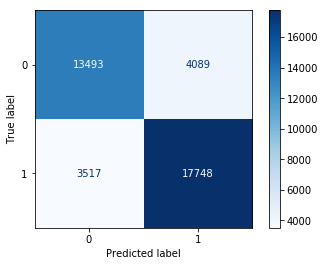

In [35]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(nb_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

<a id='RF'></a>
## 2. Random Forest Algorithm
[Top](#top)

In [36]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [38]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [37]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [39]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest object
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)  # n_estimators will change from 10 in version 0.20 to 100 in 0.22
rf_model.fit(x_train, y_train.ravel());

In [41]:
# predict values using the training data
rf_predict_train = rf_model.predict(x_train)


#Accuracy
print("Accuracy on training data: {:.2%}".format(metrics.accuracy_score(y_train, rf_predict_train))) # accuracy on training data

Accuracy on training data: 0.9958


In [42]:
# predict values using the test data
rf_predict_test = rf_model.predict(x_test)


#Accuracy
print("Accuracy on testing data: {:.2%}".format(metrics.accuracy_score(y_test, rf_predict_test))) # accuracy on testing data

Accuracy on testing data: 0.9257


Confucsion Matrix
[[16475  1107]
 [ 1780 19485]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17582
           1       0.95      0.92      0.93     21265

    accuracy                           0.93     38847
   macro avg       0.92      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



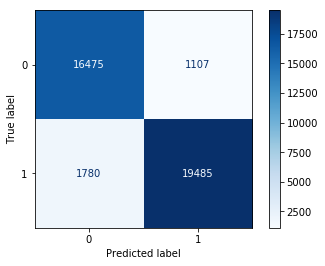

In [44]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(rf_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

<a id='DT'></a>
## 3. Decision Tree Algorithm
[Top](#top)

In [45]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [46]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [47]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [48]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree object
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(x_train, y_train.ravel());

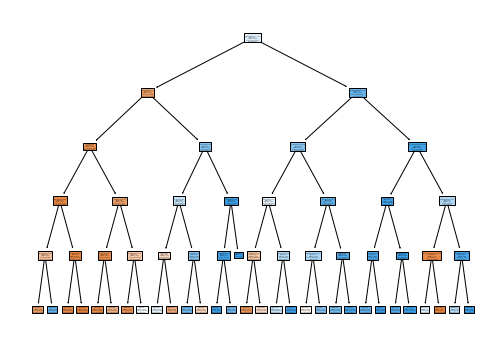

In [66]:
from sklearn.tree import plot_tree, export_text  # both are new in 0.21
plt.figure(figsize=(8, 6))
plot_tree(dt_model, feature_names=feature_col_names, class_names=['Not Satisfied', 'Satisfied'], filled=True);

In [67]:
print(export_text(dt_model, feature_names=feature_col_names, show_weights=True))

|--- Inflight_entertainment <= 3.23
|   |--- Seat_comfort <= 3.50
|   |   |--- Class <= 1.07
|   |   |   |--- Flight_Distance <= 912.50
|   |   |   |   |--- Leg_room_service <= 3.25
|   |   |   |   |   |--- weights: [543.00, 121.00] class: 0
|   |   |   |   |--- Leg_room_service >  3.25
|   |   |   |   |   |--- weights: [33.00, 161.00] class: 1
|   |   |   |--- Flight_Distance >  912.50
|   |   |   |   |--- Arival_time <= 3.08
|   |   |   |   |   |--- weights: [8607.00, 614.00] class: 0
|   |   |   |   |--- Arival_time >  3.08
|   |   |   |   |   |--- weights: [9196.00, 249.00] class: 0
|   |   |--- Class >  1.07
|   |   |   |--- On_board_service <= 3.73
|   |   |   |   |--- Checkin_service <= 4.50
|   |   |   |   |   |--- weights: [7407.00, 581.00] class: 0
|   |   |   |   |--- Checkin_service >  4.50
|   |   |   |   |   |--- weights: [408.00, 158.00] class: 0
|   |   |   |--- On_board_service >  3.73
|   |   |   |   |--- Leg_room_service <= 3.75
|   |   |   |   |   |--- weights: [196

In [68]:
# predict values using the training data
dt_predict_train = dt_model.predict(x_train)


#Accuracy
print("Accuracy on training data: {:.2%}".format(metrics.accuracy_score(y_train, dt_predict_train))) # accuracy on training data

Accuracy on training data: 0.8546


In [69]:
# predict values using the test data
dt_predict_test = dt_model.predict(x_test)


#Accuracy
print("Accuracy on testing data: {:.2%}".format(metrics.accuracy_score(y_test, dt_predict_test))) # accuracy on testing data

Accuracy on testing data: 0.8504


Confucsion Matrix
[[15610  1972]
 [ 1992 19273]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17582
           1       0.91      0.91      0.91     21265

    accuracy                           0.90     38847
   macro avg       0.90      0.90      0.90     38847
weighted avg       0.90      0.90      0.90     38847



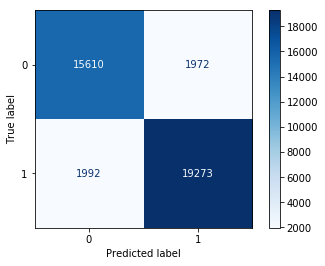

In [57]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(dt_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_predict_test))

<a id='KNN'></a>
## 4. K-Nearest Neighbors Algorithm
[Top](#top)

In [72]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [73]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [74]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [75]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNeighbors object
knn_model = KNeighborsClassifier() # weights = 'distance' make the training accuracy 100% but doesn't make difference on testing data
knn_model.fit(x_train, y_train.ravel());

In [91]:
# predict values using the training data
knn_predict_train = knn_model.predict(x_train)


#Accuracy
print("Accuracy on training data: {:.2%}".format(metrics.accuracy_score(y_train, knn_predict_train))) # accuracy on training data

Accuracy on training data: 80.48%


In [92]:
# predict values using the test data
knn_predict_test = knn_model.predict(x_test)


#Accuracy
print("Accuracy on testing data: {:.2%}".format(metrics.accuracy_score(y_test, knn_predict_test))) # accuracy on testing data

Accuracy on testing data: 69.20%


Confucsion Matrix
[[10941  6641]
 [ 5323 15942]]

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.62      0.65     17582
           1       0.71      0.75      0.73     21265

    accuracy                           0.69     38847
   macro avg       0.69      0.69      0.69     38847
weighted avg       0.69      0.69      0.69     38847



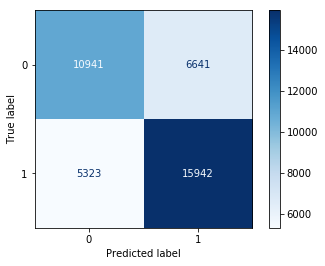

In [85]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(knn_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_predict_test))

<a id='LR'></a>
## 5. Logistic Regression Algorithm
[Top](#top)

In [93]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42, stratify=y)

                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [94]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [95]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49617 (54.741%)
Training False : 41023 (45.259%)

Test True : 21265 (54.740%)
Test Fasle : 17582 (45.260%)


In [96]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [104]:
from sklearn.linear_model import LogisticRegression
# Create LogisticRegression object
lr_model = LogisticRegression(random_state=42, max_iter=10000) 
lr_model.fit(x_train, y_train.ravel());

In [105]:
# predict values using the training data
lr_predict_train = lr_model.predict(x_train)


#Accuracy
print("Accuracy on training data: {:.2%}".format(metrics.accuracy_score(y_train, lr_predict_train))) # accuracy on training data

Accuracy on training data: 81.88%


In [106]:
# predict values using the test data
lr_predict_test = lr_model.predict(x_test)


#Accuracy
print("Accuracy on testing data: {:.2%}".format(metrics.accuracy_score(y_test, lr_predict_test))) # accuracy on testing data

Accuracy on testing data: 81.68%


Confucsion Matrix
[[13579  4003]
 [ 3113 18152]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     17582
           1       0.82      0.85      0.84     21265

    accuracy                           0.82     38847
   macro avg       0.82      0.81      0.81     38847
weighted avg       0.82      0.82      0.82     38847



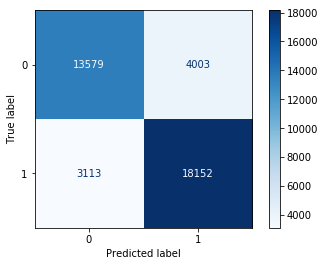

In [107]:
#print("Confucsion Matrix")   # left col predicted false , right predicted true
#print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
# plot confusion matrix
confM = metrics.plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues', values_format='d')
print("Confucsion Matrix")
print(confM.confusion_matrix)
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

## Data Visualization Bussiness Part ( skipped to be done in R language )

In [70]:
# Visualizing Gender satisification of the 
# 

'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 1]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''

'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 1]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [69]:
# Visualizing Gender dissatisification of the 
# 
'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 0]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''



'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 0]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [68]:
#groupByCleanliness = df.groupby("Cleanliness")

## Exporting data to a csv form

In [37]:
df.to_csv(r'Passenger_satisfaction_processed.csv')